In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


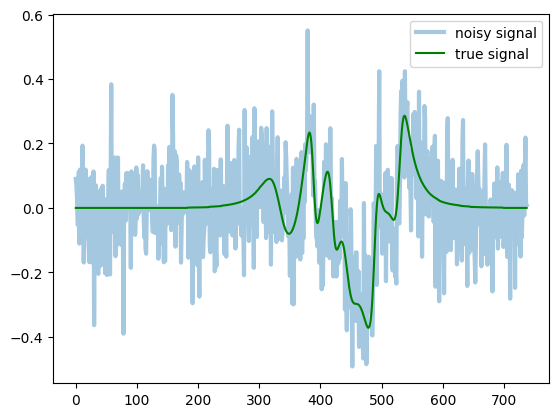

In [77]:
signal_length = int(1.5*dictionary.getAtomsLength())
signal, atoms_infos = dictionary.generateTestSignal(signal_length=signal_length, sparsity_level=7, snr_level=0)

true_signal = np.zeros_like(signal)
for atom_dict in atoms_infos :
    zs_atom = ZSAtom(atom_dict['b'], atom_dict['y'], atom_dict['s'])
    zs_atom.padBothSides(dictionary.getAtomsLength())
    atom_signal = zs_atom.getAtomInSignal(signal_length, atom_dict['x'])
    true_signal += atom_signal
plt.plot(signal, label='noisy signal', lw=3, alpha=0.4)
plt.plot(true_signal, label='true signal', color='g')
plt.legend()
plt.show()